In [0]:

# import the necessary packages

from keras.optimizers import Adam
from keras.optimizers import SGD

from sklearn.model_selection import train_test_split
import numpy as np
import argparse
import locale
import os


from google.colab import drive
drive.mount('/content/drive')



Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
import numpy as np

In [0]:

from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import concatenate
from keras.models import Model
from keras import regularizers
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping


In [0]:
def create_mlp(dim):
# define our MLP network
    model = Sequential()
    model.add(Dense(8, input_dim=dim, activation="relu"))
    
    return model

In [0]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os
import io

path=("/content/drive/My Drive/Colab Notebooks/VARNA.csv")

def load_robot_attributes():
   
    cols = ["Pressure1", "Pressure2", "Pressure3", "B_angle", "Base_Difference_XY","Tip_Difference_XY"]
    
    df = pd.read_csv(path,names=cols)
       
    return df

In [0]:
load_robot_attributes()

,Pressure1,Pressure2,Pressure3,B_angle,Base_Difference_XY,Tip_Difference_XY
0,0.324545,0.021818,0.034389,-1.791057,20,-445
1,0.321818,0.071818,0.034389,-1.802898,20,-446
2,0.334545,0.519091,0.019910,33.055985,-141,-401
3,0.377273,0.035455,0.373529,-21.215635,112,-421
4,1.131818,0.425455,0.033484,8.345637,-19,-444
5,1.129091,0.477273,0.028959,9.778632,-26,-444
6,1.132727,0.528182,0.020814,11.904586,-36,-441
7,1.136364,0.576364,0.029864,13.642215,-42,-438
8,1.118182,0.630000,0.018100,15.758292,-52,-437
9,1.132727,0.683636,0.022624,16.905555,-58,-434


In [0]:
# i m giving in Bending sensor inputs
def process_robot_attributes(df, train, test):
    
    continuous = ["Pressure1", "Pressure2", "Pressure3"]
    
    
    trainContinuous = np.array(train[continuous])
    testContinuous = np.array(test[continuous])
    
    return(trainContinuous,testContinuous)

In [0]:
# i m giving in Bending sensor inputs
def process_robot_label_attributes(df, train, test):
        
    continuous = ["B_angle","Base_Difference_XY","Tip_Difference_XY"]
    
    trainContinuous = np.array(train[continuous])
    testContinuous = np.array(test[continuous])
    
    return(trainContinuous,testContinuous)

In [0]:
print("[INFO] loading robot data attributes...")
df = load_robot_attributes()

[INFO] loading robot data attributes...


In [0]:
#Shuffle the data frame

from sklearn.utils import shuffle
df = shuffle(df)

W0828 15:47:33.075523 140111340414848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 15:47:33.120582 140111340414848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 15:47:33.127760 140111340414848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 15:47:33.179911 140111340414848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0828 15:47:33.348093 140111340414848 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_input (InputLayer)   (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


W0828 15:47:33.427341 140111340414848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1119 samples, validate on 59 samples
Epoch 1/4000
1119/1119 [==============================] - 1s 633us/step - loss: 184.8019 - acc: 0.4942 - val_loss: 183.3928 - val_acc: 0.5932
Epoch 2/4000
1119/1119 [==============================] - 0s 35us/step - loss: 184.7370 - acc: 0.4942 - val_loss: 183.3193 - val_acc: 0.5932
Epoch 3/4000
1119/1119 [==============================] - 0s 39us/step - loss: 184.6585 - acc: 0.4942 - val_loss: 183.2285 - val_acc: 0.5932
Epoch 4/4000
1119/1119 [==============================] - 0s 46us/step - loss: 184.5634 - acc: 0.4942 - val_loss: 183.1207 - val_acc: 0.5932
Epoch 5/4000
1119/1119 [==============================] - 0s 47us/step - loss: 184.4503 - acc: 0.4942 - val_loss: 182.9940 - val_acc: 0.5932
Epoch 6/4000
1119/1119 [==============================] - 0s 28us/step - loss: 184.3170 - acc: 0.4942 - val_loss: 182.8457 - val_acc: 0.5932
Epoch 7/4000
1119/1119 [==============================] - 0s 23us/step - loss: 184.1622 - acc: 0.4942 - val

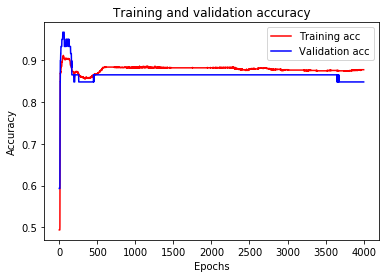

59/59 [==============================] - 0s 240us/step


In [0]:
import matplotlib.pyplot as plt

scores = []
results= []


for x in range(0, 1):


  split = train_test_split(df, test_size=0.05)
  (trainAttrX, testAttrX) = split
  (Ytrain, Ytest)= process_robot_label_attributes(df, trainAttrX, testAttrX)
  (train_final_AttrX, test_final_AttrX) = process_robot_attributes(df,trainAttrX, testAttrX)
  
  mlp = create_mlp(train_final_AttrX.shape[1])
  x = (mlp.output)
  out1 = Dense(3,  activation='linear')(x)
  model = Model(inputs=[mlp.input], outputs=[out1])
  opt = Adam(lr=1e-3, decay=1e-3 / 200)
  
  model.compile(loss='mean_absolute_error', optimizer = opt, metrics=['accuracy'])
  model.summary()
  history=model.fit([train_final_AttrX], [Ytrain], validation_data=([test_final_AttrX],[Ytest]),epochs=4000, batch_size=50,verbose=1)

  history_dict = history.history
  acc1 = history_dict['acc']
  val_acc1 = history_dict['val_acc']
  epochs = range(1, len(acc1) + 1)

  plt.plot(epochs, acc1, 'r', label='Training acc')
  plt.plot(epochs, val_acc1, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()
  
  results=model.evaluate([test_final_AttrX],[Ytest])
  scores.append(results[1])

In [0]:
scores

[0.8474576230776512]

In [0]:
print(np.mean(scores))

0.8474576230776512


In [0]:
y_pressure1=testAttrX["Pressure1"]
y_pressure2=testAttrX["Pressure2"]
y_pressure3=testAttrX["Pressure3"]

In [0]:

print("Predicted first sensor Output")
preds = model.predict([test_final_AttrX])

print("Predicted Output values" ,preds[0], "\t","Actual Output values",Ytest[0])
print("Predicted Output values" ,preds[1], "\t","Actual Output values",Ytest[1])
print("Predicted Output values" ,preds[2], "\t","Actual Output values",Ytest[2])
print("Predicted Output values" ,preds[3], "\t","Actual Output values",Ytest[3])
print("Predicted Output values" ,preds[4], "\t","Actual Output values",Ytest[4])
print("Predicted Output values" ,preds[5], "\t","Actual Output values",Ytest[5])
print("Predicted Output values" ,preds[6], "\t","Actual Output values",Ytest[6])
print("Predicted Output values" ,preds[7], "\t","Actual Output values",Ytest[7])
print("Predicted Output values" ,preds[8], "\t","Actual Output values",Ytest[8])
print("Predicted Output values" ,preds[9], "\t","Actual Output values",Ytest[9])

Predicted first sensor Output
Predicted Output values [  14.360967  -44.463703 -434.53577 ] 	 Actual Output values [  13.11856713  -39.         -439.        ]
Predicted Output values [ -33.60987  174.68442 -388.26172] 	 Actual Output values [ -33.24611618  173.         -390.        ]
Predicted Output values [ -25.291985  135.86308  -409.631   ] 	 Actual Output values [ -25.20768232  136.         -412.        ]
Predicted Output values [  25.73264   -96.732735 -416.93695 ] 	 Actual Output values [  26.20901034 -103.         -419.        ]
Predicted Output values [  23.584782  -87.558525 -419.1453  ] 	 Actual Output values [  25.39948171 -100.         -419.        ]
Predicted Output values [ -21.491104  118.328026 -406.51144 ] 	 Actual Output values [ -25.5417672  135.        -409.       ]
Predicted Output values [ -19.033981  105.78605  -426.50342 ] 	 Actual Output values [ -16.16329093   87.         -432.        ]
Predicted Output values [ -24.055798  130.62872  -412.4678  ] 	 Actual Ou

In [0]:

Predicted_bending=[]
Actual_bending=[]

Predicted_BASE_difference=[]
Actual_BASE_difference=[]

Predicted_TIP_difference=[]
Actual_TIP_difference=[]

count=[]


for i in range(0,59):
    
     count.append(i)
      
     Predicted_bending.append(preds[i][0]) 
     Actual_bending.append(Ytest[i][0])
      
     Predicted_BASE_difference.append(preds[i][1]) 
     Actual_BASE_difference.append(Ytest[i][1])
      
     Predicted_TIP_difference.append(preds[i][2]) 
     Actual_TIP_difference.append(Ytest[i][2])
     

In [0]:
from sklearn.metrics import mean_absolute_error

score1 = mean_absolute_error(Predicted_bending,Actual_bending) # calculate the mean absolute error of the Bending angles
print("The mean absolute error between the bending is", score1)

score2 = mean_absolute_error(Predicted_BASE_difference,Actual_BASE_difference) # calculate the mean absolute error of the base difference
print("The mean absolute error between the base difference is",score2)

score3 = mean_absolute_error(Predicted_TIP_difference,Actual_TIP_difference) # calculate the mean absolute error of the TIP difference
print("The mean absolute error between the tip difference is",score3)

The mean absolute error between the bending is 3.4524878759739757
The mean absolute error between the base difference is 19.099966926089788
The mean absolute error between the tip difference is 5.154788776979608


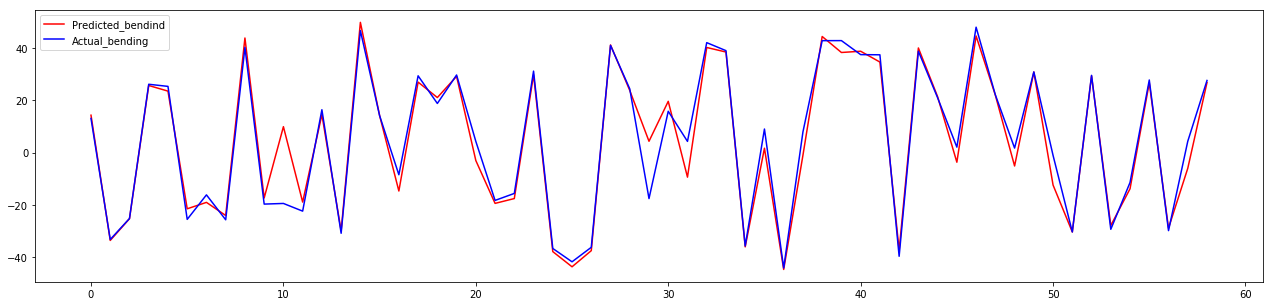

In [0]:
import matplotlib.pyplot as plt
import pylab 

pylab.figure(figsize=(22,5))

# red dashes, blue squares and green triangles
pylab.plot(count,Predicted_bending, 'R', label ='Predicted_bendind')
pylab.plot(count,Actual_bending, 'B', label ='Actual_bending')

pylab.legend(loc='upper left')
pylab.show()


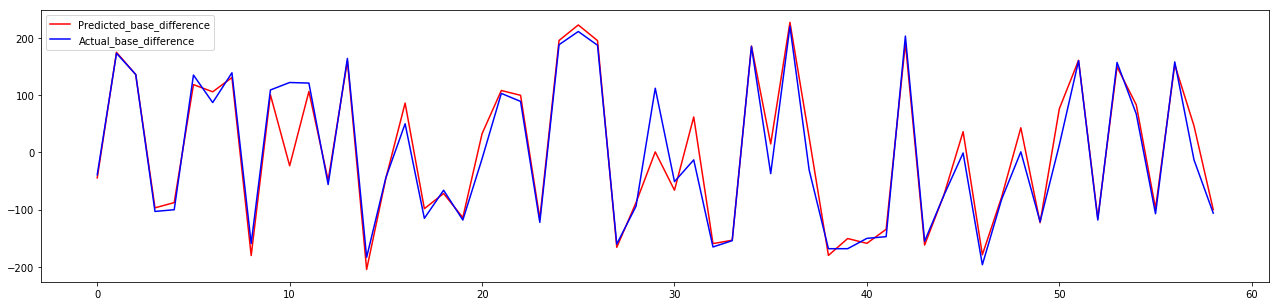

In [0]:
pylab.figure(figsize=(22,5))

# red dashes, blue squares and green triangles
pylab.plot(count,Predicted_BASE_difference, 'R', label ='Predicted_base_difference')
pylab.plot(count,Actual_BASE_difference, 'B', label ='Actual_base_difference')

pylab.legend(loc='upper left')
pylab.show()


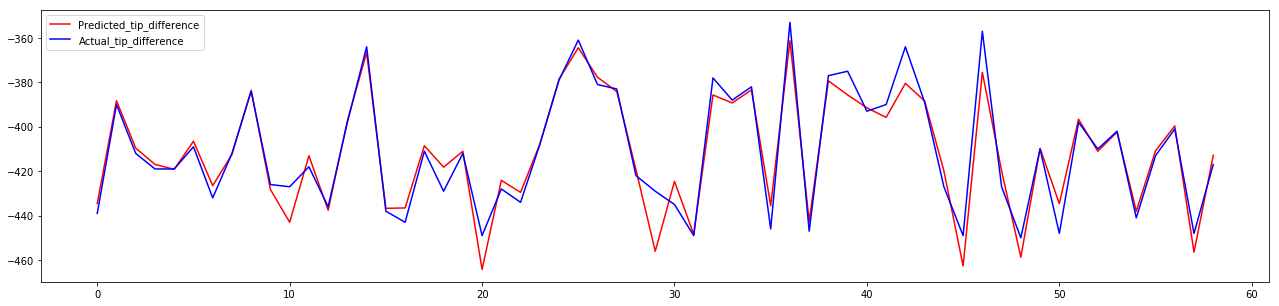

In [0]:
pylab.figure(figsize=(22,5))

# red dashes, blue squares and green triangles
pylab.plot(count,Predicted_TIP_difference, 'R', label ='Predicted_tip_difference')
pylab.plot(count,Actual_TIP_difference, 'B', label ='Actual_tip_difference')

pylab.legend(loc='upper left')
pylab.show()
